In [1]:
from fastai.basics import *
absolute_path = Path().absolute()
sys.path.append(str(absolute_path.parents[0]))
from enveco.data.image import *

In [5]:
data_path = Path('../../enveco_data/enveco/')

train = pd.read_csv(data_path/'AV.leaf.on.train.csv')
train = train.rename(columns = lambda x: re.sub('[\.]+', '_', x))


Select only plots with at least 75% broadleaved trees.

In [59]:
def find_lp_maj(row):
    lp_pct = row.v_lp/row.v
    if lp_pct >= 0.75: return 1
    return 0

In [60]:
train['lp_maj'] = train.apply(lambda row: find_lp_maj(row), axis=1)

In [67]:
lp_images = [mask_plot_from_image(open_geotiff(data_path/f'AV_tif/{f}.tif'))
            for f in train[train.lp_maj == 1].sampleplotid.values]

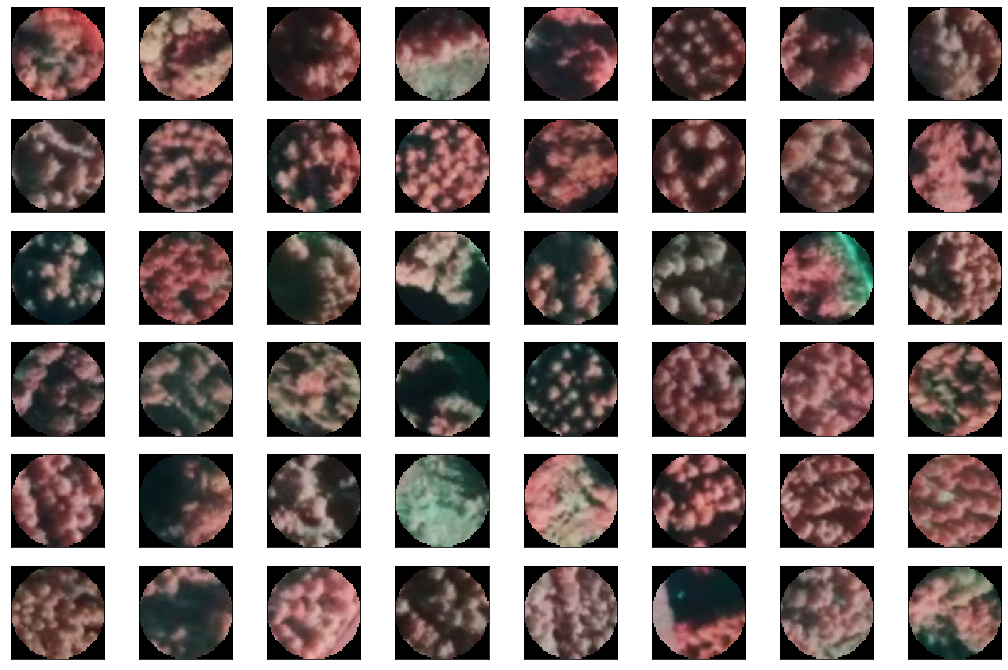

In [75]:
import random
testims = lp_images#random.sample(lp_images, 48)
fig, axs = plt.subplots(6,8, figsize=(18,12))

for i, a in enumerate(axs.flatten()):
    a.set_xticks([])
    a.set_yticks([])
    im = a.imshow(testims[i].swapaxes(0,2).swapaxes(0,1))

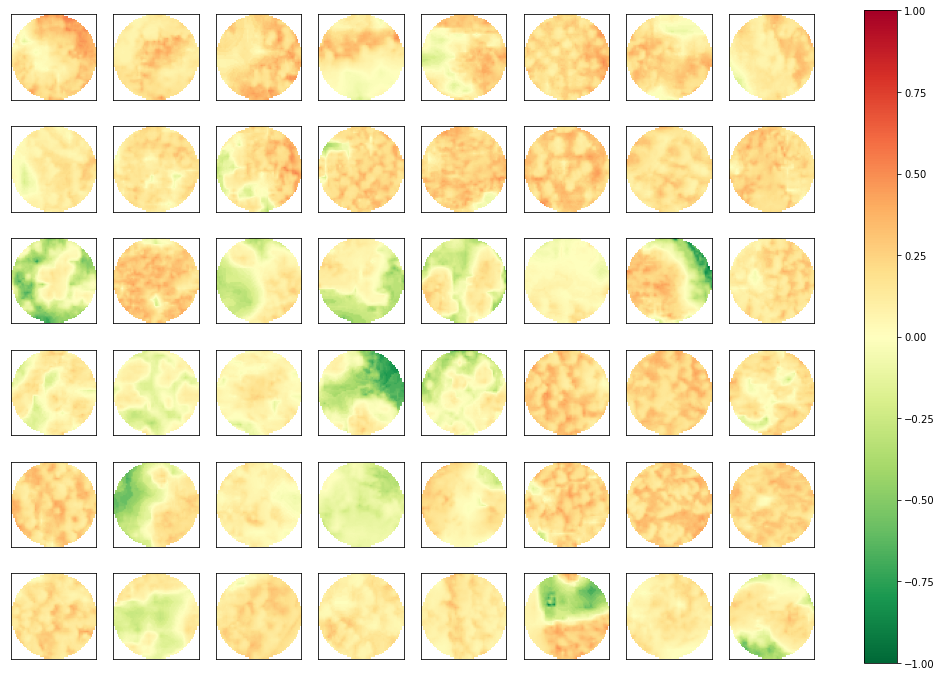

In [76]:
fig, axs = plt.subplots(6,8, figsize=(18,12))
ndvi_ims = [calc_normalized_spectral_index(testim, 0, 1) for testim in testims]
for i, a in enumerate(axs.flatten()):
    a.set_xticks([])
    a.set_yticks([])
    im = a.imshow(ndvi_ims[i], vmin=-1, vmax=1, cmap='RdYlGn_r')

fig.colorbar(im, ax=axs.ravel().tolist())
plt.show()

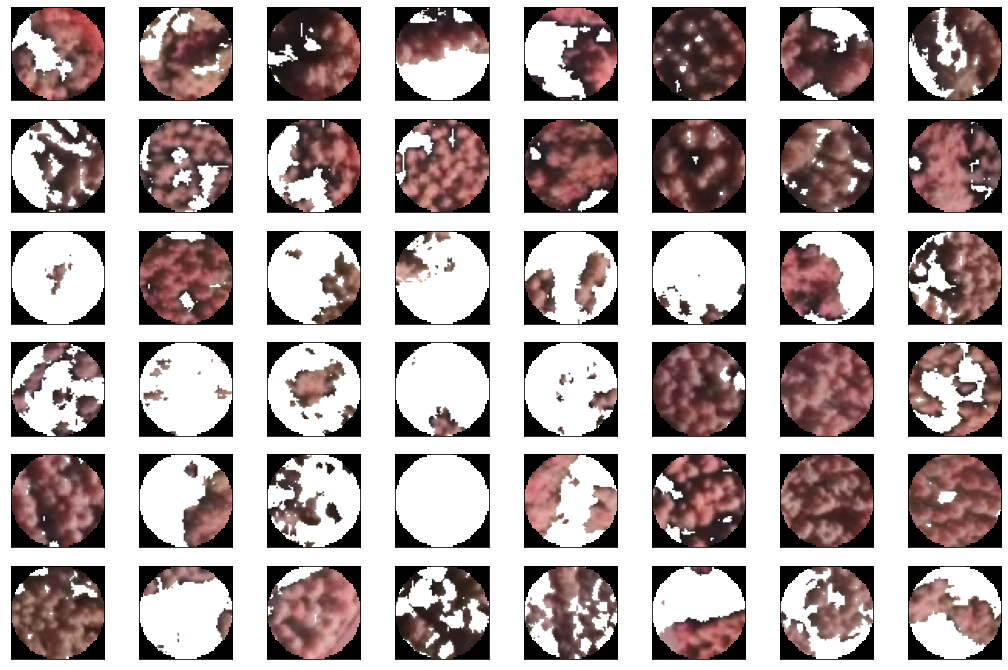

In [81]:
fig, axs = plt.subplots(6,8, figsize=(18,12))
ndvi_tresh = 0.1
for i, a in enumerate(axs.flatten()):
    a.set_xticks([])
    a.set_yticks([])
    tempim = testims[i].copy()
    tempim[:,ndvi_ims[i] < ndvi_tresh] = 1
    im = a.imshow(tempim.swapaxes(0,2).swapaxes(0,1))